In [1]:
## PLOT  WEIGHTED CORREALTIONS

In [1]:
%matplotlib inline

import numpy as np
import time
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import XTC, GRO
import MDAnalysis.analysis.rms
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.analysis import align
import glob
print(MDAnalysis.__version__)

2.1.0


In [2]:
#####-------100ns------#####
alpha_start = 107
alpha_end = 125
actloop_start = 208
actloop_end = 233
#############################

In [8]:
myPath = '/Volumes/3KSPAT/from_2KSPAT/metad_convergence/wt/free_ener_wt/8us/traj_corr_0'
s_numer = np.loadtxt(myPath+'/'+str(0)+'combo_sum_numer.txt')


In [4]:
temp_numer = np.zeros((360,360))
temp_deno_1 = np.zeros((360,360))
temp_deno_2 = np.zeros((360,360))
for i in range(0,9):
    myPath = '/Volumes/3KSPAT/from_2KSPAT/metad_convergence/wt/free_ener_wt/8us/traj_corr_' + str(i)
    for j in range(0,30):
        s_numer = np.loadtxt(myPath+'/'+str(j)+'combo_sum_numer.txt')
        s_deno_1 = np.loadtxt(myPath+'/'+str(j)+'combo_sum_deno1.txt')
        s_deno_2 = np.loadtxt(myPath+'/'+str(j)+'combo_sum_deno2.txt')
        temp_numer = temp_numer + s_numer
        temp_deno_1 = temp_deno_1 + s_deno_1
        temp_deno_2 = temp_deno_2 + s_deno_2
        

In [14]:
temp_numer.shape

(360, 360)

In [31]:
BW_correlation = np.zeros((360,360))
for i in range(0,len(temp_numer)):
    for j in range(0,len(temp_numer)):
        nume = temp_numer[i][j]
        deno1 = temp_deno_1[i][j] ** 0.5
        deno2 = temp_deno_2[i][j] ** 0.5
        BW_correlation[i][j] = nume / (deno1 * deno2 )
        
    

In [3]:
BW_correlation

In [33]:
np.savetxt('Boltzmann_wighted_WT_corr.txt',BW_correlation)

In [5]:
BW_correlation = np.loadtxt('Boltzmann_wighted_WT_corr.txt')

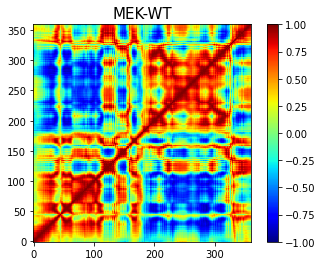

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(BW_correlation, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('MEK-WT',fontsize=15)
plt.clim(-1,1)
plt.savefig('WT.png', bbox_inches = 'tight', dpi = 300)
plt.show()

## Coarse grained correlation matrices and chord plot

In [3]:
C_wt = np.loadtxt('Boltzmann_wighted_WT_corr.txt')

In [4]:
beta_1_start = 68 - 34
beta_1_end = 74 - 34


ploop_start = 75 - 34
ploop_end = 81 - 34

beta_2_start = 82 - 34
beta_2_end = 87 - 34

beta_3_start = 92 - 34
beta_3_end = 100 - 34



alpha_C_start =  107 - 34
alpha_C_end =  125 - 34


beta_4_start = 129 - 34
beta_4_end = 134 - 34

beta_5_start = 138 - 34
beta_5_end = 144 - 34



alpha_D_start = 149 - 34
alpha_D_end = 159 - 34


alpha_E_start = 162 - 34
alpha_E_end = 185 - 34


catloop_start = 186 - 34
catloop_end = 194 - 34



beta_7_start = 196 - 34
beta_7_end = 198 - 34



beta_8_start = 204 - 34
beta_8_end = 206 - 34

activation_loop_start = 208 - 34
activation_loop_end = 233 - 34


alpha_F_start = 242 - 34
alpha_F_end = 259 - 34


 
alpha_G_start = 309 - 34
alpha_G_end = 319 - 34

alpha_H_start = 331 - 34
alpha_H_end = 342 - 34


alpha_I_start = 351 - 34
alpha_I_end = 367 - 34

In [4]:
#C_wt

In [6]:

res_lst_start = [beta_1_start,ploop_start, beta_2_start, beta_3_start, alpha_C_start, beta_4_start, beta_5_start,alpha_D_start,alpha_E_start,catloop_start,beta_7_start,beta_8_start,activation_loop_start,alpha_F_start,alpha_G_start,alpha_H_start, alpha_I_start  ]
res_lst_end = [beta_1_end, ploop_end, beta_2_end, beta_3_end, alpha_C_end,beta_4_end, beta_5_end, alpha_D_end, alpha_E_end,catloop_end,beta_7_end, beta_8_end,activation_loop_end,alpha_F_end,alpha_G_end,alpha_H_end, alpha_I_end    ]

reduced_corr = np.zeros((len(res_lst_start),len(res_lst_start)))
for i in range(0,len(res_lst_start)):
    for j in range(0,len(res_lst_start)):
        reduced_corr[i][j] = np.average(C_wt[res_lst_start[i]:res_lst_end[i], res_lst_start[j]:res_lst_end[j]])

        
        
        
        
        
        
        
        

In [5]:
#reduced_corr

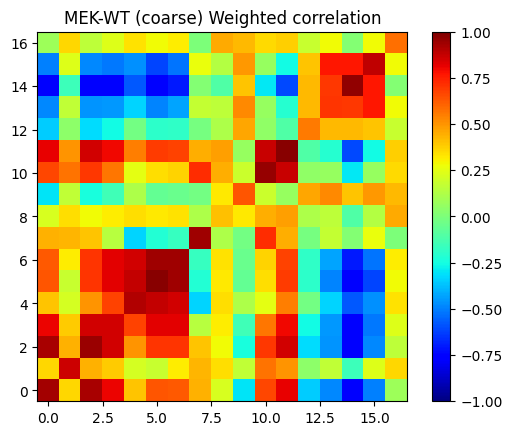

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
plt.title('MEK-WT (coarse) Weighted correlation')
plt.clim(-1,1)
plt.savefig('WT_coarse.png', bbox_inches = 'tight', dpi = 300)
plt.show()

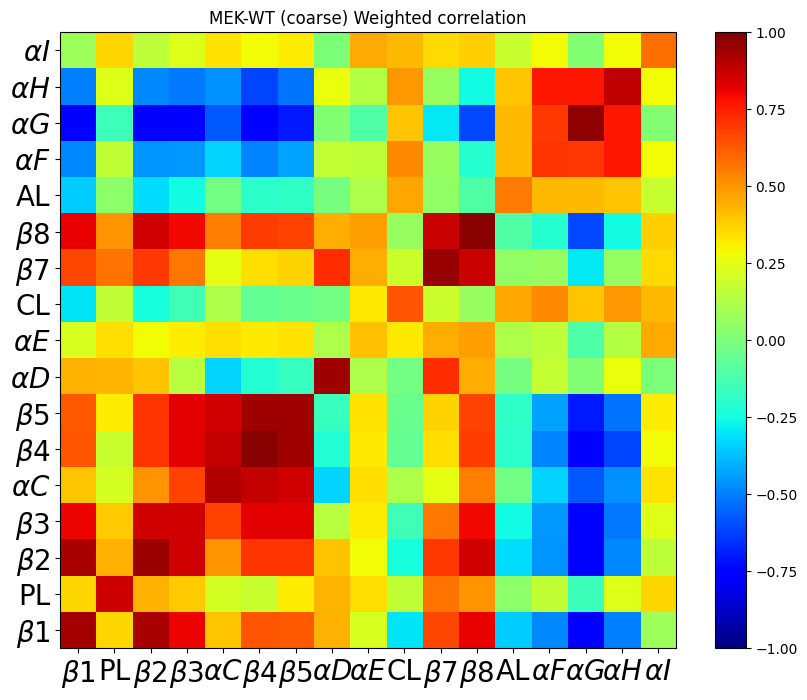

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))
plt.imshow(reduced_corr, cmap='jet', interpolation='nearest',origin='lower')
plt.colorbar()
text_values = [r'$\beta 1$','PL', r'$\beta 2$', r'$\beta 3$', r'$\alpha C$', r'$\beta 4$', r'$\beta 5$', r'$\alpha D$', r'$\alpha E$','CL', r'$\beta 7$',r'$\beta 8$', 'AL', r'$\alpha F$', r'$\alpha G$', r'$\alpha H$', r'$\alpha I$']
x_values = np.arange(0, len(text_values), 1)
plt.xticks(x_values, text_values,fontsize=20)
plt.yticks(x_values, text_values,fontsize=20)

plt.title('MEK-WT (coarse) Weighted correlation')
plt.clim(-1,1)
plt.savefig('WT_coarse.png', bbox_inches = 'tight', dpi = 300)
plt.show()

In [10]:
reduced_corr = np.around(reduced_corr,decimals=2)

In [6]:
#reduced_corr

In [12]:
len(reduced_corr[0])

17

In [13]:
x = len(reduced_corr[0])*len(reduced_corr[0])
y = 3

data = [[1 for j in range(y)] for i in range(x)]

In [7]:
#data

In [15]:
coarse_residue_list = text_values

In [16]:
coarse_residue_list = ['\u03B21','p-loop', '\u03B22','\u03B23', '\u03B1C','\u03B24','\u03B25','\u03B1D', '\u03B1E','CL','\u03B27','\u03B28','AL','\u03B1F','\u03B1G', '\u03B1H', '\u03B1I'    ]
coarse_residue_list

['β1',
 'p-loop',
 'β2',
 'β3',
 'αC',
 'β4',
 'β5',
 'αD',
 'αE',
 'CL',
 'β7',
 'β8',
 'AL',
 'αF',
 'αG',
 'αH',
 'αI']

In [17]:
for i in range(0,len(reduced_corr[0])):
    for j in range(0,len(reduced_corr[0])):
        data[i*len(reduced_corr[0])+j][0] = coarse_residue_list[i]
        data[i*len(reduced_corr[0])+j][1] = coarse_residue_list[j]
        data[i*len(reduced_corr[0])+j][2] = reduced_corr[i][j]
        
        

In [8]:
#data

In [19]:
import pandas as pd
df = pd.DataFrame(data)
df.columns = ['preferredName_A', 'preferredName_B', 'score']


#cutoff = 0.7
#df1 = df[(df['score'] >= cutoff)]
#df2 = df[(df['score'] <= -cutoff)]

#df.loc[np.abs(df['score']) <= 0.7,'score'] = 0    # 0.5,0.6,0.7,0.8,0.9


In [20]:
df = pd.read_csv('/Users/owner/Desktop/wt.csv')
df1 = df[['preferredName_A','preferredName_B', 'score' ]] 
df1

,preferredName_A,preferredName_B,score
0,β1,β1,0.93
1,β1,p-loop,0.00
2,β1,β2,0.93
3,β1,β3,0.81
4,β1,αC,0.00
...,...,...,...
284,αI,AL,0.00
285,αI,αF,0.00
286,αI,αG,0.00
287,αI,αH,0.00


In [9]:
#df

In [10]:
#df

In [11]:
#df2

In [13]:
frames = [df1, df2]

df3 = result = pd.concat(frames)
df3

In [21]:
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import cm
from nxviz.plots import CircosPlot


In [22]:
interactions = df1

In [14]:
interactions = np.array(interactions)
intew = np.array(interactions) # convert to array for clarity
#interactions

In [15]:
inters=[]
for i in range(0,len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # CA a node
    b = interaction[1] # CA b node
    inters.append(list(interaction)) 
        
# inters

In [25]:
coarse_residue_list

['β1',
 'p-loop',
 'β2',
 'β3',
 'αC',
 'β4',
 'β5',
 'αD',
 'αE',
 'CL',
 'β7',
 'β8',
 'AL',
 'αF',
 'αG',
 'αH',
 'αI']

In [17]:
temp = np.zeros((1,3))
#temp

In [27]:

for i in range(0,len(inters)):
    if  coarse_residue_list.index(inters[i][0]) != coarse_residue_list.index(inters[i][1]) :
        temp = np.vstack((temp ,inters[i]))   

In [28]:
inters = temp[1:]

In [29]:
len(inters)

272

In [18]:
inters

In [31]:
len(inters)

272

In [32]:

inters_new = np.zeros((1,3))

for i in range(0,len(inters)):
    te = ['','','']
    te[0] = inters[i][1]
    te[1] = inters[i][0]
    te[2] = inters[i][2]
    c = 0
    for j in range(i+1,len(inters)):
        if te[0] == inters[j][0] and te[1] == inters[j][1] and te[2] == inters[j][2]:
            c = 1
            break;
        else:
            c=0
    if c == 0:
        inters_new = np.vstack((inters_new,inters[i]))
        
        

In [19]:
inters_new

In [34]:
inters = inters_new[1:]

In [35]:
len(inters_new)

137

In [36]:

coarse_residue_list

['β1',
 'p-loop',
 'β2',
 'β3',
 'αC',
 'β4',
 'β5',
 'αD',
 'αE',
 'CL',
 'β7',
 'β8',
 'AL',
 'αF',
 'αG',
 'αH',
 'αI']

In [20]:
#inters

In [38]:
coarse_residue_list.index(inters[1][0])

2

In [21]:
#inters

In [40]:
G=nx.Graph(name='Protein Interaction Graph')


       
for i in range(0,len(inters)):
    intes = inters[i]
    a = intes[0] # CA a node
    b = intes[1] # CA b node
    #w = intes[2] # score as weighted edges
    w = np.abs(int(float(intes[2])*100))
    
    G.add_edge(a,b,weight=w)



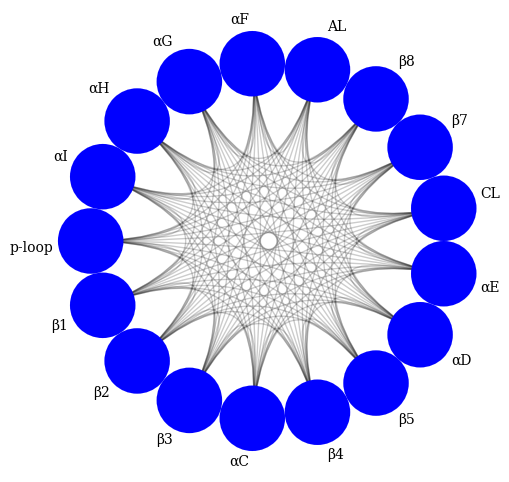

In [41]:
c = CircosPlot(G,node_labels=True)
c.draw()
plt.show()

In [42]:
G.edges

EdgeView([('p-loop', 'β1'), ('p-loop', 'β2'), ('p-loop', 'β3'), ('p-loop', 'αC'), ('p-loop', 'β4'), ('p-loop', 'β5'), ('p-loop', 'αD'), ('p-loop', 'αE'), ('p-loop', 'CL'), ('p-loop', 'β7'), ('p-loop', 'β8'), ('p-loop', 'AL'), ('p-loop', 'αF'), ('p-loop', 'αG'), ('p-loop', 'αH'), ('p-loop', 'αI'), ('β1', 'β2'), ('β1', 'β3'), ('β1', 'αC'), ('β1', 'β4'), ('β1', 'β5'), ('β1', 'αD'), ('β1', 'αE'), ('β1', 'CL'), ('β1', 'β7'), ('β1', 'β8'), ('β1', 'AL'), ('β1', 'αF'), ('β1', 'αG'), ('β1', 'αH'), ('β1', 'αI'), ('β2', 'β3'), ('β2', 'αC'), ('β2', 'β4'), ('β2', 'β5'), ('β2', 'αD'), ('β2', 'αE'), ('β2', 'CL'), ('β2', 'β7'), ('β2', 'β8'), ('β2', 'AL'), ('β2', 'αF'), ('β2', 'αG'), ('β2', 'αH'), ('β2', 'αI'), ('β3', 'αC'), ('β3', 'β4'), ('β3', 'β5'), ('β3', 'αD'), ('β3', 'αE'), ('β3', 'CL'), ('β3', 'β7'), ('β3', 'β8'), ('β3', 'AL'), ('β3', 'αF'), ('β3', 'αG'), ('β3', 'αH'), ('β3', 'αI'), ('αC', 'β4'), ('αC', 'β5'), ('αC', 'αD'), ('αC', 'αE'), ('αC', 'CL'), ('αC', 'β7'), ('αC', 'β8'), ('αC', 'AL'), ('

In [43]:

def my_ord(e):
    print(coarse_residue_list.index(e[0]) )
    return(coarse_residue_list.index(e[0]))
    




# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax,rnd=False):
    arr = list(l)
    print(arr)
    return [round((x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin,2) for x in arr]

nodelist = [n for n in G.nodes]
#ws = rescale([float(G[u][v]['weight']) for u,v in G.edges],1,10)
ws = rescale([float(G[u][v]['weight'])**70 for u,v in G.edges],1,50)
edgelist = [(str(u),str(v),{"weight":ws.pop(0)}) for u,v in G.edges]

# create new graph using nodelist and edgelist
g = nx.Graph(name='Protein Interaction Graph')

g.add_nodes_from(sorted(G.nodes(data=True),  key=my_ord))
g.add_edges_from(G.edges(data=True))




[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.220229359218424e+137, 3.926009277181815e+133, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.926009277181815e+133, 0.0, 0.0, 4.538908832145072e+131, 0.0, 0.0, 2.599510566229246e+135, 0.0, 3.873329203992417e+129, 3.873329203992417e+129, 0.0, 0.0, 0.0, 0.0, 2.599510566229246e+135, 0.0, 0.0, 1.133315326611527e+132, 0.0, 0.0, 0.0, 2.1650427009440272e+134, 9.267650915486838e+133, 0.0, 0.0, 0.0, 0.0, 1.6455045573212062e+133, 0.0, 0.0, 1.7959259981379795e+131, 0.0, 0.0, 1.2995322165440308e+136, 1.1463699676873304e+135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3150726690291264e+138, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7959259981379795e+131, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0310381857130016e+130, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.839123801678142e+135, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

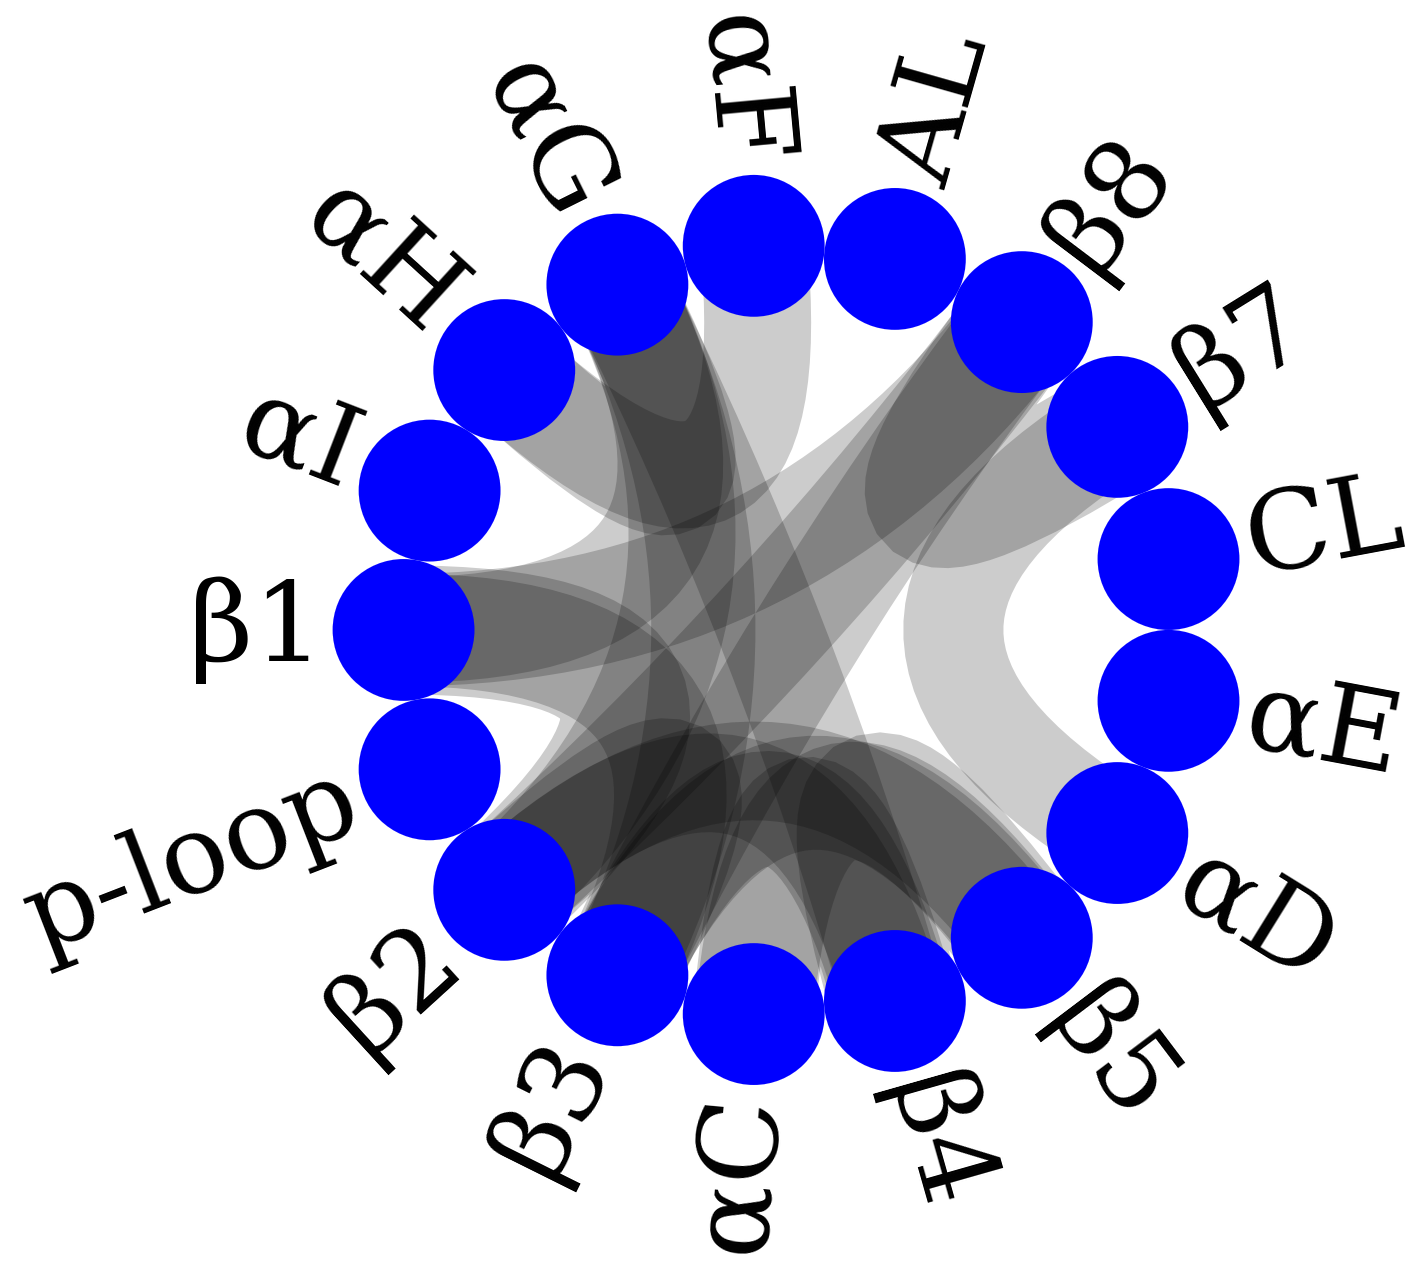

In [44]:
#d = dict(g.degree)
c = CircosPlot(graph=g,figsize=(13, 13),node_grouping=None,
               edge_width="weight",node_labels=True,node_label_layout = "rotation",fontsize=80)

c.draw()

plt.savefig("Kori_circusplot_customlegend3_cutoff_0.7.png", format="png", dpi=400, bbox_inches="tight")

## Display graph
plt.show()